In [10]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

In [4]:
# Read data
data = pd.read_csv("./All Data.csv")
data.describe()

,GP,W,L,AGT,K,D,KD,CKPM,GPR,GSPD,...,BN%,LNE%,JNG%,WPM,CWPM,WCPM,win_rate,EGR,MLR,year
count,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,...,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000
mean,9.719298,4.859649,4.859649,34.390476,125.087719,125.428571,1.012005,0.746416,-0.155388,-0.012301,...,0.440426,0.447987,0.453461,3.219173,0.975764,1.288195,44.597018,32.896491,-2.355388,2017.949875
std,6.239073,4.208791,3.513842,3.457307,92.600155,84.898990,0.536490,0.146694,1.053208,0.075798,...,0.233307,0.152075,0.141766,1.076066,0.439101,0.473416,25.363616,24.840955,15.627106,2.068547
min,2.000000,0.000000,0.000000,24.500000,5.000000,8.000000,0.170000,0.330000,-4.840000,-0.326000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-56.300000,2015.000000
25%,5.000000,2.000000,3.000000,32.050000,54.000000,66.000000,0.720000,0.650000,-0.605000,-0.049000,...,0.290000,0.490500,0.460500,3.075000,0.695000,1.140000,26.390000,0.000000,-8.950000,2016.000000
50%,8.000000,4.000000,4.000000,34.300000,104.000000,95.000000,0.950000,0.740000,0.000000,0.000000,...,0.460000,0.498000,0.492000,3.440000,1.100000,1.390000,42.860000,41.100000,0.000000,2018.000000
75%,13.500000,7.000000,6.000000,36.400000,176.500000,161.500000,1.220000,0.850000,0.425000,0.028500,...,0.600000,0.505000,0.517000,3.770000,1.300000,1.575000,60.555000,53.200000,1.200000,2019.000000
max,28.000000,26.000000,25.000000,48.500000,477.000000,460.000000,7.000000,1.130000,3.210000,0.269000,...,1.000000,0.521000,0.613000,5.410000,1.780000,2.140000,100.000000,82.300000,53.400000,2021.000000


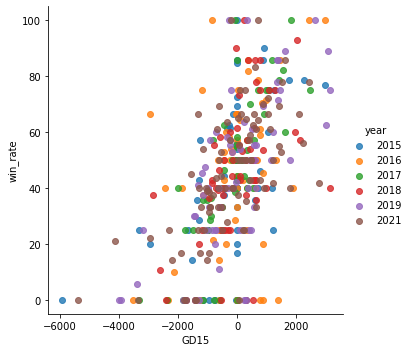

In [17]:
sns.lmplot(data = data, x = 'GD15', y = 'win_rate', hue = 'year', fit_reg = False)

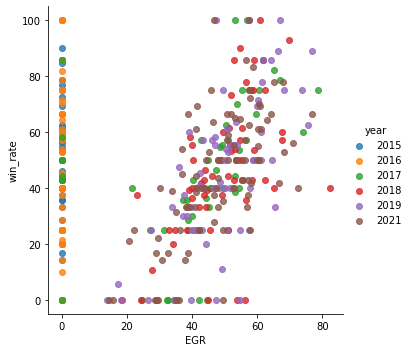

In [16]:
sns.lmplot(data = data, x = 'EGR', y = 'win_rate', hue = 'year', fit_reg = False)